### Example 3.1 An ARMA Process for the NAO

In [2]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#读取网站内容
ulr = 'https://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/norm.nao.monthly.b5001.current.ascii.table'
response = requests.get(ulr)
response.encoding='utf-8'
print(response.text)

1950   0.92   0.40  -0.36   0.73  -0.59  -0.06  -1.26  -0.05   0.25   0.85  -1.26  -1.02
1951   0.08   0.70  -1.02  -0.22  -0.59  -1.64   1.37  -0.22  -1.36   1.87  -0.39   1.32
1952   0.93  -0.83  -1.49   1.01  -1.12  -0.40  -0.09  -0.28  -0.54  -0.73  -1.13  -0.43
1953   0.33  -0.49  -0.04  -1.67  -0.66   1.09   0.40  -0.71  -0.35   1.32   1.04  -0.47
1954   0.37   0.74  -0.83   1.34  -0.09  -0.25  -0.60  -1.90  -0.44   0.60   0.40   0.69
1955  -1.84  -1.12  -0.53  -0.42  -0.34  -1.10   1.76   1.07   0.32  -1.47  -1.29   0.17
1956  -0.22  -1.12  -0.05  -1.06   2.21   0.10  -0.75  -1.37   0.24   0.88   0.51   0.10
1957   1.05   0.11  -1.26   0.49  -0.79  -0.72  -1.19  -0.55  -1.66   1.32   0.73   0.12
1958  -0.54  -1.06  -1.96   0.37  -0.24  -1.38  -1.73  -1.56  -0.07   0.16   1.64  -0.70
1959  -0.87   0.68  -0.15   0.36   0.39   0.40   0.74   0.06   0.88   0.89   0.41   0.44
1960  -1.29  -1.89  -0.50   1.36   0.45  -0.21   0.35  -1.40   0.39  -1.73  -0.51   0.06
1961   0.41   0.45   

In [4]:
table = response.text
# print(type(table))
list = table.split('\n')[:-6] # 1950-2017
total_value_list = []
for i in list:
    year_value = i.split('  ')
    length = len(year_value)
    if length>1:
        for j in range(length-1):
            total_value_list.append(float(year_value[j+1]))


# print(float(total_value_list))
value = pd.Series(total_value_list)
time = pd.date_range('1950/1','2017/12',freq='MS')
# print(time)

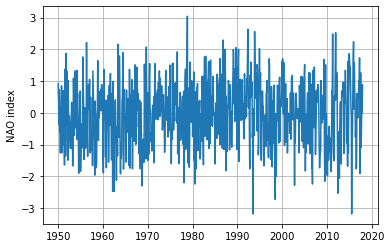

In [5]:
plt.plot(time,total_value_list)
plt.grid()
plt.ylabel('NAO index')
plt.show()


In [6]:
import scipy.stats as stats
mean = round(value.mean(),3)
std = round(value.std(),3)
skew = stats.skew(value)
kurt = stats.kurtosis(value)+3
print(f'mean={mean}, \nstandard deviation={std},\nskewness={skew},\nkurtosis={kurt}')

mean=-0.015, 
standard deviation=1.012,
skewness=-0.09929804686802456,
kurtosis=2.6662792877095183


### Jarque and Bera (1980) test


In [7]:
print('JB检验：',stats.jarque_bera(value))


JB检验： Jarque_beraResult(statistic=5.127537356802058, pvalue=0.07701395202587857)


p value = 0.08 > 0.05 接收假设，和正态分布相匹配
### SACF and se

[ 1.          0.18603222  0.05425111  0.00674692 -0.04778622  0.02435158
 -0.01586524 -0.0202691   0.00940039  0.04409532  0.04016654  0.03086131
  0.05861933  0.07614917 -0.01396937 -0.03254522 -0.09206466 -0.02792349
 -0.04408013  0.01922425  0.00656632 -0.03544561  0.02128562  0.06037383
  0.07036272  0.08203187  0.04929213  0.06458964  0.01366376  0.00523167
  0.01744938  0.00704684  0.03276923  0.04563869  0.03363479  0.03918809
  0.01746842  0.01444705  0.08014246  0.03722412  0.04395049]
[ 1.          0.18626048  0.02039915 -0.00720358 -0.0508857   0.04412409
 -0.02543807 -0.01611318  0.01533479  0.04729163  0.0207565   0.01637353
  0.05280253  0.06165031 -0.04556598 -0.02763032 -0.07791385  0.00980286
 -0.04653452  0.0397699  -0.00914015 -0.04206737  0.01998331  0.06230336
  0.04965981  0.06035156  0.03386512  0.06897387 -0.00158514  0.01650315
  0.01869145  0.00731396  0.00807708  0.03701305  0.01040244  0.01613228
 -0.01796302 -0.00231096  0.07882877  0.01557801  0.04372695]


C:\Users\Jingyi_Wang\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\Jingyi_Wang\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
C:\Users\Jingyi_Wang\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1024: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


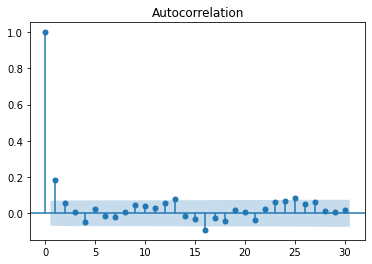

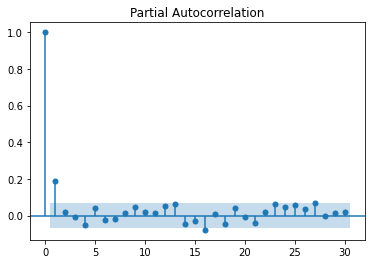

In [8]:
import statsmodels.tsa.api as smt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
ACF = smt.stattools.acf(value)
PACF=smt.stattools.pacf(value)
print(ACF)
print(PACF)
plot_acf(value)
plot_pacf(value)
plt.show()


In [9]:
import statsmodels.tsa.api as smt

resultAR = smt.ARMA(value, order=(1, 0)).fit(maxlag=5,method='mle', trend='nc')
resultMA = smt.ARMA(value, order=(0, 1)).fit(maxlag=5,method='mle', trend='nc')

print(resultAR.summary())
print(resultMA.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  816
Model:                     ARMA(1, 0)   Log Likelihood               -1152.587
Method:                           mle   S.D. of innovations              0.994
Date:                Sun, 26 Jun 2022   AIC                           2309.174
Time:                        22:56:52   BIC                           2318.583
Sample:                             0   HQIC                          2312.785
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.1864      0.034      5.417      0.000       0.119       0.254
                                    Roots                                    
                  Real          Imaginary           M

C:\Users\Jingyi_Wang\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
